# Exploring eBay Car Sales Data

Knowledge is the best resource for getting the best deal on a used car. Unlike new vehicles, used cars have been on the road and suffered some degrees of wear and tear.

One could be a first-time buyer looking for their first used car or an enthusiast tracking down that best value deal; used car sites simplify the shopping experience with detailed, searchable listings, car reviews, buyers guides, and more. These sites don't just help buyers find cars; they are an excellent resource for evaluating purchase options in terms of potential value for paid money.

We will explore a dataset of used cars from _[eBay Kleinanzeigen](https://www.ebay-kleinanzeigen.de)_, a [classifieds](https://en.wikipedia.org/wiki/Classified_advertising) section of the German eBay website. We aim to glean some insights into the nature and popularity of listed cars, then understand which cars promise the most value for price-conscious buyers.

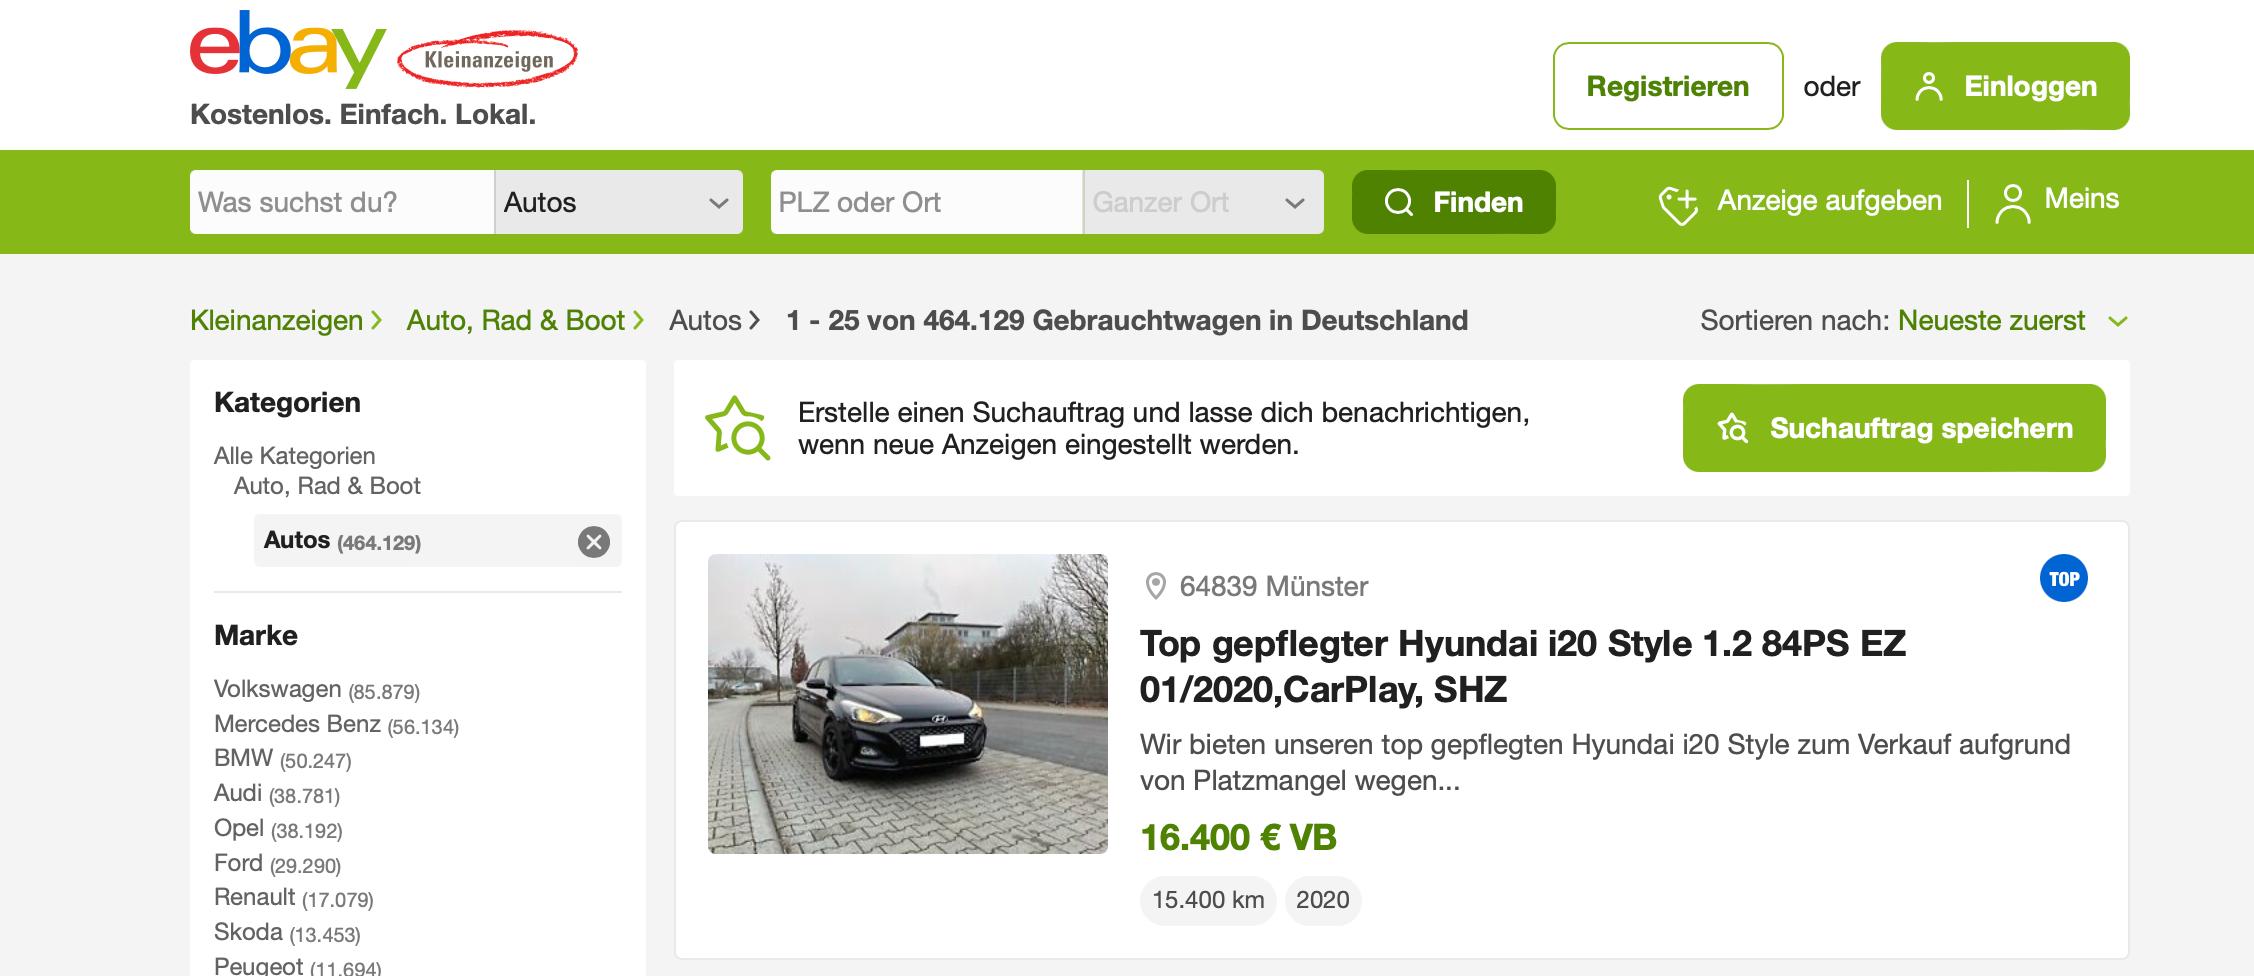

## Summary of Findings

It is effortless to believe that as mileage increases, so does a car's wear and tear. From ebay Kleinanzeigen's listings, we observed that these two may not always correlate. Even a vehicle with low mileage can sustain more than its fair share of wear and tear, negatively impacting the value. Hence, it is essential to devise a metric that combines price, unrepaired damage, and mileage to determine a prospective purchase's overall value.


## Dataset Overview

The original dataset was cleaned to make the data easier to work with. However, our version has been intentionally *dirtied*, with a sample of 50,000 data points from the original *(credits to [DataQuest](https://www.dataquest.io))*. If you need to refer to the original dataset, you can find it [here](https://data.world/data-society/used-cars-data). 


## Data Dictionary

Here is an overview of the 20 columns in the dataset:

- `dateCrawled`:- When this ad was first crawled. All field-values are taken from this date.
- `name`:- Name of the car.
- `seller`:- Whether the seller is private or a dealer.
- `offerType`:- The type of listing
- `price`:- The price on the ad to sell the car.
- `abtest`:- Whether the listing is included in an A/B test.
- `vehicleType`:- The vehicle Type.
- `yearOfRegistration` - The year in which the car was first registered.
- `gearbox`:- The transmission type.
- `powerPS`:- The power of the car in PS.
- `model`:- The car model name.
- `kilometer`:- How many kilometers the car has driven.
- `monthOfRegistration`:- The month in which the car was first registered.
- `fuelType`:- What type of fuel the car uses.
- `brand`:- The brand of the car.
- `notRepairedDamage`:- If the car has a damage which is not yet repaired.
- `dateCreated`:- The date on which the eBay listing was created.
- `nrOfPictures`:- The number of pictures in the ad.
- `postalCode`:- The postal code for the location of the vehicle.
- `lastSeenOnline`:- When the crawler saw this ad last online.

Since our dataset version is dirty, we will perform some cleaning before analysis.

## Importing Libraries

Let's start by importing the libraries we need. We will import the `Numpy` library to perform quick, vectorized operations on our data, the `Pandas` library to extend the functionalities of Numpy even further.

In [1]:
# Import the Numpy and Pandas libraries
import pandas as pd
import numpy as np

Load `autos.csv` and explore the used car information.

In [2]:
autos = pd.read_csv('autos.csv',encoding='Latin-1')

In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [4]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


The data contains used car information for five thousand automobiles in 2016. The columns `vehicleType`, `gearbox`, `model`, `fuelType`, and `notRepairedDamage` contain null values which we will need to clean.

## 1. Cleaning Column Names

We observe that the `autos.csv` contains

- 20 columns, most of which are strings.
- Some columns have null values, but none have more than ~20% null values.
- The column names use [camelcase](https://en.wikipedia.org/wiki/Camel_case) instead of Python's preferred [snakecase](https://en.wikipedia.org/wiki/Snake_case), which means we can't just replace spaces with underscores.

We will convert the column names from camelcase to snakecase and reword some of the column names based on the data dictionary to be more descriptive.

In [5]:
# Column names
cols = autos.columns

In [6]:
col_names ={
    "dateCrawled":"date_crawled",
    "name":"name",
    "seller":"seller",
    "offerType":"offer_type",
    "price":"price",
    "abtest":"ab_test",
    "vehicleType":"vehicle_type",
    "yearOfRegistration":"registration_year",
    'gearbox':"gear_box",
    "powerPS":"power_PS",
    "model":"model",
    "odometer":"odometer",
    "monthOfRegistration":"registration_month",
    "fuelType":"fuel_type",
    "brand":"brand",
    "notRepairedDamage":"unrepaired_damage",
    "dateCreated":"ad_created",
    "nrOfPictures":"number_of_pictures",
    "postalCode":"postal_code",
    "lastSeen":"last_seen"
}

autos.rename(columns=col_names,inplace=True)
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gear_box,power_PS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,number_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


We now have updated all column names to `snake_case`.

## 2. Initial Exploration and Cleaning

We will now perform data exploration to determine what other cleaning tasks need to be done. Initially we will look for:

- Text columns where all or almost all values are the same. These can often be dropped as they don't have useful information for analysis.
- Examples of numeric data stored as text which can be cleaned and converted.

The following methods are helpful for exploring the data:

- `DataFrame.describe()` (with `include='all'` to get both categorical and numeric columns)
- `Series.value_counts()` and `Series.head()` if any columns need a closer look.

In [7]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gear_box,power_PS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,number_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


From the dataset above we may observe:
* Each column has a count of 50,000 records and colums such as `seller` and `offer_type` have similar information.
* The `number_of_pictures` column looks strange and needs further investigation.
* `postal_code`, `odometer` and `price` column data are examples of numeric data stored as text that need to be cleaned and converted.
* The price column has numeric data stored as text with dollar symbols. We will need to convert it to numeric data in order to work with it.
* We need to address the `NaNs` (not a number) in various columns

We will now clean the `price` and `odometer` columns and rename the `odometer` column to `odometer_km`.

In [8]:
autos['price']=autos['price'].str.replace(',','').str.replace(r'$','',regex=True).astype(float)
autos['price'].head(10)

0    5000.0
1    8500.0
2    8990.0
3    4350.0
4    1350.0
5    7900.0
6     300.0
7    1990.0
8     250.0
9     590.0
Name: price, dtype: float64

In [9]:
autos['odometer']=autos['odometer'].str.replace(',','').str.replace('km','').astype(int)
autos.rename({"odometer": "odometer_km"},axis=1,inplace=True)
autos['odometer_km'].head(10)

0    150000
1    150000
2     70000
3     70000
4    150000
5    150000
6    150000
7    150000
8    150000
9    150000
Name: odometer_km, dtype: int32

We will also clean the colums `seller`, `offer_type`, `number_of_picture`.

In [10]:
autos["number_of_pictures"].value_counts()

0    50000
Name: number_of_pictures, dtype: int64

In [11]:
autos["seller"].value_counts()

privat        49999
gewerblich        1
Name: seller, dtype: int64

In [12]:
autos["offer_type"].value_counts()

Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64

These three columns don't offer valuable information. We will delete them from our dataset.

In [13]:
autos = autos.drop(["seller", "offer_type","number_of_pictures"], axis=1)
autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gear_box,power_PS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000.0,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500.0,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990.0,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350.0,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350.0,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


## 3. Exploring the Odometer and Price Columns

We now continue exploring the data, specifically looking for data that doesn't look right. We'll start by analyzing the `odometer_km` and `price` columns. Here's the steps we'll take:

- Analyze the columns using minimum and maximum values and look for any values that look unrealistically high or low (outliers) that we might want to remove.
- We'll use:
    -  `Series.unique().shape` to see how many unique values
    -`Series.describe()` to view min/max/median/mean etc
    - `Series.value_counts()`, with some variations:
        - chained to `.head()` if there are lots of values.
        - Because `Series.value_counts()` returns a series, we can use `Series.sort_index()` with `ascending= True` or `False` to view the highest and lowest values with their counts (can also chain to `head()` here).
- When removing outliers, we can do `df[(df["col"] >= x ) & (df["col"] <= y )]`, but it's more readable to use `df[df["col"].between(x,y)]`

In [14]:
# Uniqe values of the odometer series (reported in km)
autos['odometer_km'].unique().shape

(13,)

In [15]:
# Statistical information - min/max/median/mean 
autos['odometer_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [16]:
# Review variations and display in descending order
autos['odometer_km'].value_counts().sort_index(ascending=False)

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
40000       819
30000       789
20000       784
10000       264
5000        967
Name: odometer_km, dtype: int64

We see that the values in the `odometer_km` field are rounded, which may indicate that sellers had to choose from preselected options. We can also see that there are a lot of high mileage vehicles over 100,000 km.

In [17]:
# Uniqe values of the price series (reported in $)
autos['price'].unique().shape

(2357,)

In [18]:
# Statistical information - min/max/median/mean 
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [19]:
# Review variations and display in descending order
autos['price'].value_counts().sort_index().head(20)

0.0     1421
1.0      156
2.0        3
3.0        1
5.0        2
8.0        1
9.0        1
10.0       7
11.0       2
12.0       3
13.0       2
14.0       1
15.0       2
17.0       3
18.0       1
20.0       4
25.0       5
29.0       1
30.0       7
35.0       1
Name: price, dtype: int64

In [20]:
autos['price'].value_counts().sort_index(ascending=False).head(20)

99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
3890000.0     1
1300000.0     1
1234566.0     1
999999.0      2
999990.0      1
350000.0      1
345000.0      1
299000.0      1
295000.0      1
265000.0      1
259000.0      1
250000.0      1
220000.0      1
198000.0      1
197000.0      1
Name: price, dtype: int64

In [21]:
sold_for_zero_dollars =  1421
total_percent_sold_for_zero_dollars = 1421/ autos['price'].shape[0] * 100
print("Percentage of used automobiles sold for free:", total_percent_sold_for_zero_dollars,'%.')

Percentage of used automobiles sold for free: 2.842 %.


The `prices` column looks rounded. However, there are 2357 unique prices.

There are 1,421 cars listed for free. This accounts for 2.842% of the automobiles sold. We might consider removing these rows because it is illogical to sell a car for zero dollars. We've also found out that the maximum used automobile price is one hundred million dollars. Let's explore further.

In [22]:
# Review high prices
autos["price"].value_counts().sort_index(ascending=False).head(20)

99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
3890000.0     1
1300000.0     1
1234566.0     1
999999.0      2
999990.0      1
350000.0      1
345000.0      1
299000.0      1
295000.0      1
265000.0      1
259000.0      1
250000.0      1
220000.0      1
198000.0      1
197000.0      1
Name: price, dtype: int64

In [23]:
# Review low prices
autos["price"].value_counts().sort_index(ascending=True).head(20)

0.0     1421
1.0      156
2.0        3
3.0        1
5.0        2
8.0        1
9.0        1
10.0       7
11.0       2
12.0       3
13.0       2
14.0       1
15.0       2
17.0       3
18.0       1
20.0       4
25.0       5
29.0       1
30.0       7
35.0       1
Name: price, dtype: int64

There are a decent amount of car sales below `$35`. As Ebay is an online auction site, we could be seeing items where the opening bid is `$1`.

We will keep the `$1` items, but remove anything above `$400,000`. It is unlikely that many people are buying used cars greater than `$400,000`.

In [24]:
# Remove greatly overpriced cars
autos = autos[autos["price"].between(1, 400000)]
autos["price"].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

In [25]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48565 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date_crawled        48565 non-null  object 
 1   name                48565 non-null  object 
 2   price               48565 non-null  float64
 3   ab_test             48565 non-null  object 
 4   vehicle_type        43979 non-null  object 
 5   registration_year   48565 non-null  int64  
 6   gear_box            46222 non-null  object 
 7   power_PS            48565 non-null  int64  
 8   model               46107 non-null  object 
 9   odometer_km         48565 non-null  int32  
 10  registration_month  48565 non-null  int64  
 11  fuel_type           44535 non-null  object 
 12  brand               48565 non-null  object 
 13  unrepaired_damage   39464 non-null  object 
 14  ad_created          48565 non-null  object 
 15  postal_code         48565 non-null  int64  
 16  last

## 4. Exploring the date columns

There are 5 columns representing date values. Some of these columns were created by the crawler and some came from the website itself. We can differentiate by referring to the data dictionary:

- `date_crawled`: added by the crawler
- `last_seen`: added by the crawler
- `ad_created`: from the website
- `registration_month`: from the website
- `registration_year`: from the website

Right now, the `date_crawled`, `last_seen`, and `ad_created` columns are all identified as string values by pandas. We will convert the data into a numerical representation so we can understand it quantitatively. The other two columns are represented as numeric values, so we can use methods like `Series.describe()` to understand the distribution without any extra data processing.

In [26]:
# Let's first understand how the values in the three string columns are formatted. 
# These columns all represent full timestamp values, like so:
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


We will now calculate the distribution of values in the `date_crawled`, `ad_created`, and `last_seen `columns (all string columns) as percentages.

In [27]:
autos['date_crawled'].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05 14:06:30    0.000021
2016-03-05 14:06:40    0.000021
2016-03-05 14:07:04    0.000021
2016-03-05 14:07:08    0.000021
2016-03-05 14:07:21    0.000021
                         ...   
2016-04-07 14:30:09    0.000021
2016-04-07 14:30:26    0.000021
2016-04-07 14:36:44    0.000021
2016-04-07 14:36:55    0.000021
2016-04-07 14:36:56    0.000021
Name: date_crawled, Length: 46882, dtype: float64

In [28]:
autos["date_crawled"].str[:10].value_counts(normalize=True, dropna=False).sort_values()

2016-04-07    0.001400
2016-04-06    0.003171
2016-03-18    0.012911
2016-04-05    0.013096
2016-03-06    0.014043
2016-03-13    0.015670
2016-03-05    0.025327
2016-03-24    0.029342
2016-03-16    0.029610
2016-03-27    0.031092
2016-03-25    0.031607
2016-03-17    0.031628
2016-03-31    0.031834
2016-03-10    0.032184
2016-03-26    0.032204
2016-03-23    0.032225
2016-03-11    0.032575
2016-03-22    0.032987
2016-03-09    0.033090
2016-03-08    0.033296
2016-04-01    0.033687
2016-03-30    0.033687
2016-03-29    0.034099
2016-03-15    0.034284
2016-03-19    0.034778
2016-03-28    0.034860
2016-04-02    0.035478
2016-03-07    0.036014
2016-04-04    0.036487
2016-03-14    0.036549
2016-03-12    0.036920
2016-03-21    0.037373
2016-03-20    0.037887
2016-04-03    0.038608
Name: date_crawled, dtype: float64

From the analysis above, we can see that the data was being crawled on a daily basis for about one to two months between March 2016 and April 2016. The site was crawled on a daily basis.

In [29]:
autos['ad_created'].value_counts(normalize=True, dropna=False).sort_index()

2015-06-11 00:00:00    0.000021
2015-08-10 00:00:00    0.000021
2015-09-09 00:00:00    0.000021
2015-11-10 00:00:00    0.000021
2015-12-05 00:00:00    0.000021
                         ...   
2016-04-03 00:00:00    0.038855
2016-04-04 00:00:00    0.036858
2016-04-05 00:00:00    0.011819
2016-04-06 00:00:00    0.003253
2016-04-07 00:00:00    0.001256
Name: ad_created, Length: 76, dtype: float64

In [30]:
autos['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_values()

2016-02-16    0.000021
2016-02-09    0.000021
2015-09-09    0.000021
2016-01-07    0.000021
2016-01-16    0.000021
                ...   
2016-03-12    0.036755
2016-04-04    0.036858
2016-03-21    0.037579
2016-03-20    0.037949
2016-04-03    0.038855
Name: ad_created, Length: 76, dtype: float64

In 2016, most of the adds were created in the months of March and April.

In [31]:
autos['last_seen'].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05 14:45:46    0.000021
2016-03-05 14:46:02    0.000021
2016-03-05 14:49:34    0.000021
2016-03-05 15:16:11    0.000021
2016-03-05 15:16:47    0.000021
                         ...   
2016-04-07 14:58:44    0.000062
2016-04-07 14:58:45    0.000021
2016-04-07 14:58:46    0.000021
2016-04-07 14:58:48    0.000062
2016-04-07 14:58:50    0.000062
Name: last_seen, Length: 38474, dtype: float64

In [32]:
autos['last_seen'].str[:10].value_counts(normalize=True, dropna=False).sort_values()

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-18    0.007351
2016-03-08    0.007413
2016-03-13    0.008895
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-14    0.012602
2016-03-27    0.015649
2016-03-19    0.015834
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-26    0.016802
2016-03-23    0.018532
2016-03-25    0.019211
2016-03-24    0.019767
2016-03-21    0.020632
2016-03-20    0.020653
2016-03-28    0.020859
2016-03-22    0.021373
2016-03-29    0.022341
2016-04-01    0.022794
2016-03-31    0.023783
2016-03-12    0.023783
2016-04-04    0.024483
2016-03-30    0.024771
2016-04-02    0.024915
2016-04-03    0.025203
2016-03-17    0.028086
2016-04-05    0.124761
2016-04-07    0.131947
2016-04-06    0.221806
Name: last_seen, dtype: float64

The site crawler recorded the date it last saw any listing. This is presumably the last day before the car was sold. As there isn't any extreme outliers in the data, we may assume that cars were being sold on a daily basis.

The last three days have an unusually high number of `last seen` values. It's unlikely that there was a massive rise in sales, and it's more likely that these values are related to the crawling period ending and do not indicate car sales.

In [33]:
# We will also exmaine the registration month
autos["registration_month"].describe()

count    48565.000000
mean         5.782251
std          3.685595
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: registration_month, dtype: float64

In [34]:
# and the registration year
autos["registration_year"].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

The data above for the `registration_year` column looks strange. How could someone have sold a car in the years `1000` and `9999`? This doesn't make sense and is likely a result of invalid data entry. It also doesn't make sense to include month `0` as the first month of the calendar year is January.

## 5. Dealing with Incorrect Registration Year Data

One thing that stands out from the exploration we did above. The `registration_year` column contains some odd values:

- The minimum value is `1000`, before cars were invented
- The maximum value is `9999`, many years into the future
Because a car can't be first registered after the listing was seen, any vehicle with a registration year above `2016` is definitely inaccurate. Determining the earliest valid year is more difficult. Realistically, it could be somewhere in the first few decades of the `1900s`.

Let's count the number of listings with cars that fall outside the `1900 - 2016` interval and see if it's safe to remove those rows entirely, or if we need more custom logic.

In [35]:
# Percentage of cars sold outside of 1900 - 2016
autos_sold_in_range = autos['registration_year'].between(1900,2016).sum()
all_autos_sold = autos['registration_year'].shape[0]
percent_sold_outside_range = 100 - (autos_sold_in_range / all_autos_sold * 100)
print("Percentage of automobiles sold outside of 1900-2016:",percent_sold_outside_range,"%.")

Percentage of automobiles sold outside of 1900-2016: 3.879336971069705 %.


Less than `4%` of the total automobiles sold is outside of `1900 - 2016`. We can safely remove these sales from our dataset.

In [36]:
autos = autos[autos['registration_year'].between(1900,2016)]
autos['registration_year'].value_counts(normalize=True).head(30)

2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
2008    0.047450
2009    0.044665
1997    0.041794
2011    0.034768
2010    0.034040
1996    0.029412
2012    0.028063
1995    0.026285
2016    0.026135
2013    0.017202
2014    0.014203
1994    0.013474
1993    0.009104
2015    0.008397
1992    0.007926
1990    0.007433
1991    0.007262
1989    0.003727
1988    0.002892
1985    0.002035
Name: registration_year, dtype: float64

We now have cars registered in the early `2000s` and in the late `1990s`. This looks like what should be expected from car sales.

## 6. Exploring Price by Brand

We will use `aggregation` for the analysis of `prices by brand`. Since we are working with car data, it's natural to explore `variations` across different car brands.

The `aggregation` technique will help us to understand the `brand` column for this analysis.

We will use ***loops*** to to perfom `aggregation`, the process will be as follows:

* Identify the unique values we want to aggregate by
* Create an empty dictionary to store our aggregate data
* Loop over the unique values, and for each: - Subset the dataframe by the unique values - Calculate the mean of whichever column we're interested in - Assign the `val/mean` to the dict as `k/v`.

In [37]:
# brands
autos["brand"].value_counts(normalize=True).to_frame().head(10)

,brand
volkswagen,0.211264
bmw,0.110045
opel,0.107581
mercedes_benz,0.096463
audi,0.086566
ford,0.069900
renault,0.047150
peugeot,0.029841
fiat,0.025642
seat,0.018273


Let's see which brands we are going to aggregate.

In [38]:
unique_brands = autos["brand"].unique()
unique_brands.shape[0]

40

In [39]:
first_five = autos["brand"].value_counts(normalize=True).head().sum() * 100
print("First five brands are",first_five,"percent of total brands." )

First five brands are 61.191919624686705 percent of total brands.


As shown above, the German automotive companies dominate the `top 5`, which contribute to over `50%` of the brand value. `Volkswagen` is the most popular brand, with approximately double the cars for sale of the next two brands combined.

Because there are many brands with a small percentage of listings, we will limit our analysis to brands with more than `5%` of total listings. 

In [40]:
b_counts = autos["brand"].value_counts(normalize=True)
#  using Series.index attribute to access the labels
c_brands = b_counts[b_counts > 0.05].index
print(c_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')


We selected the brands with a listing of over `5%` because they have significant percentages in the total listings.

In [41]:
# Loop over your selected brands, and assign the mean price to the dictionary,
# with the brand name as the key.

brand_mean_prices = {}
for b in c_brands:
    b_name = autos[autos["brand"] == b] # brand name
    b_price = b_name["price"].mean() # mean price of brand name
    brand_mean_prices[b] = int(b_price)# populating dict with brand_name: mean_price key:value pair
brand_mean_prices

{'volkswagen': 5402,
 'bmw': 8332,
 'opel': 2975,
 'mercedes_benz': 8628,
 'audi': 9336,
 'ford': 3749}

From this dataset, this is what We've been able to gather:
* `Audi`, `BMW` and `Mercedes Benz` are more expensive compared to the others
* `Opel` and `Ford` are less expensive
* `Volkswagen` is in between - this may explain its popularity, it may be  best for different car categories.

##  7. Storing Aggregate Data in a DataFrame

Now we are going to store our aggregate data into a dataframe. We `aggregated` our data in order to understand the `mean price` for our top brands where we found a distinct price gap in the top 6 brands.

We are also going to find the `mileage` for the top 6 brands using this `aggregation` technique. This will help us to find out if there in any viable linkage to the mean price.

In [42]:
brand_mean_mileage = {}
for b in c_brands:
    b_name = autos[autos["brand"] == b] # brand name
    b_mileage = b_name["odometer_km"].mean() # mean price of brand name
    brand_mean_mileage[b] = float(b_mileage)# populating dict with brand_name: mean_price key:value pair
brand_mean_mileage

{'volkswagen': 128707.15879132022,
 'bmw': 132572.51313996495,
 'opel': 129310.0358422939,
 'mercedes_benz': 130788.36331334666,
 'audi': 129157.38678544914,
 'ford': 124266.01287159056}

Let's create a `series` for both dictionaries.

In [43]:
bmp_series = pd.Series(brand_mean_prices)
bmm_series = pd.Series(brand_mean_mileage)

print('Brand Mean Price Series')
print(bmp_series)
print()
print('Brand Mean Mileage Series')
print(bmm_series)

Brand Mean Price Series
volkswagen       5402
bmw              8332
opel             2975
mercedes_benz    8628
audi             9336
ford             3749
dtype: int64

Brand Mean Mileage Series
volkswagen       128707.158791
bmw              132572.513140
opel             129310.035842
mercedes_benz    130788.363313
audi             129157.386785
ford             124266.012872
dtype: float64


Now, let's convert the `series` into a `dataframe`.

In [44]:
brand_df = pd.DataFrame(bmp_series, columns=['mean_price'])
brand_df

,mean_price
volkswagen,5402
bmw,8332
opel,2975
mercedes_benz,8628
audi,9336
ford,3749


In [45]:
# Add the series representation of mean_mileage as a new column
brand_df['mean_mileage'] = bmm_series
brand_df

,mean_price,mean_mileage
volkswagen,5402,128707.158791
bmw,8332,132572.513140
opel,2975,129310.035842
mercedes_benz,8628,130788.363313
audi,9336,129157.386785
ford,3749,124266.012872


# Conclusions

Our analysis of eBay Kleinanzeigen's listings showed the influence of price, mileage and unrepaired damage on a car's overall value. We identified the most popular cars on the website listings, examined the relationship between mileage and price, then explored the effects of unrepaired damage on a car's value. 